In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import my_statistics_funcs as sf
from typing import Literal

In [3]:
with open("z_table.csv") as f:
    z_table_csv_df = pd.read_csv(f, index_col=0)

z_table_csv_df.head(10)

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
Z,,,,,,,,,,
-3.9,0.00005,0.00005,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.00003,0.00003
-3.8,0.00007,0.00007,0.00007,0.00006,0.00006,0.00006,0.00006,0.00005,0.00005,0.00005
-3.7,0.00011,0.00010,0.00010,0.00010,0.00009,0.00009,0.00008,0.00008,0.00008,0.00008
-3.6,0.00016,0.00015,0.00015,0.00014,0.00014,0.00013,0.00013,0.00012,0.00012,0.00011
-3.5,0.00023,0.00022,0.00022,0.00021,0.00020,0.00019,0.00019,0.00018,0.00017,0.00017
-3.4,0.00034,0.00032,0.00031,0.00030,0.00029,0.00028,0.00027,0.00026,0.00025,0.00024
-3.3,0.00048,0.00047,0.00045,0.00043,0.00042,0.00040,0.00039,0.00038,0.00036,0.00035
-3.2,0.00069,0.00066,0.00064,0.00062,0.00060,0.00058,0.00056,0.00054,0.00052,0.00050
-3.1,0.00097,0.00094,0.00090,0.00087,0.00084,0.00082,0.00079,0.00076,0.00074,0.00071


In [4]:
z_table_neg_df = pd.DataFrame({"Z": [float(row) - float(col) for row in z_table_csv_df.index[:40] for col in z_table_csv_df.columns[::-1]],
                               "Probability": [z_table_csv_df.iloc[row, col] for row in range(40) for col in range(9, -1, -1)]})
z_table_neg_df = z_table_neg_df.iloc[:-1][:]
z_table_pos_df = pd.DataFrame({"Z": [float(row) + float(col) for row in z_table_csv_df.index[40:] for col in z_table_csv_df.columns],
                               "Probability": [z_table_csv_df.iloc[row, col] for row in range(40, 80) for col in range(10)]})
z_table_df = pd.concat([z_table_neg_df, z_table_pos_df]).reset_index(drop=True)

z_table_df.head(402)

,Z,Probability
0,-3.99,0.00003
1,-3.98,0.00003
2,-3.97,0.00004
3,-3.96,0.00004
4,-3.95,0.00004
...,...,...
397,-0.02,0.49202
398,-0.01,0.49601
399,0.00,0.50000
400,0.01,0.50399


In [5]:
with open("t_tabel.csv") as f:
    t_table_csv_df = pd.read_csv(f)

t_table_csv_df.head(10)

,t Table,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,one-tail,0.5,0.250,0.200,0.150,0.100,0.050,0.025,0.010,0.005,0.001,0.0005
2,two-tails,1.0,0.500,0.400,0.300,0.200,0.100,0.050,0.020,0.010,0.002,0.0010
3,df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.0,1.000,1.376,1.963,3.078,6.314,12.710,31.820,63.660,318.310,636.6200
5,2,0.0,0.816,1.061,1.386,1.886,2.920,4.303,6.965,9.925,22.327,31.5990
6,3,0.0,0.765,0.978,1.250,1.638,2.353,3.182,4.541,5.841,10.215,12.9240
7,4,0.0,0.741,0.941,1.190,1.533,2.132,2.776,3.747,4.604,7.173,8.6100
8,5,0.0,0.727,0.920,1.156,1.476,2.015,2.571,3.365,4.032,5.893,6.8690
9,6,0.0,0.718,0.906,1.134,1.440,1.943,2.447,3.143,3.707,5.208,5.9590


In [6]:
t_table_df = pd.DataFrame({f"{float(t_table_csv_df.iloc[2, col])}": [float(t_table_csv_df.iloc[row, col]) for row in range(4, len(t_table_csv_df.index))] for col in range(1, len(t_table_csv_df.columns))})
t_table_df["df"] = t_table_csv_df.iloc[4:, 0].reset_index(drop=True)
t_table_df.set_index("df", drop=True, inplace=True)

t_table_df

,1.0,0.5,0.4,0.3,0.2,0.1,0.05,0.02,0.01,0.002,0.001
df,,,,,,,,,,,
1,0.0,1.000,1.376,1.963,3.078,6.314,12.710,31.820,63.660,318.310,636.620
2,0.0,0.816,1.061,1.386,1.886,2.920,4.303,6.965,9.925,22.327,31.599
3,0.0,0.765,0.978,1.250,1.638,2.353,3.182,4.541,5.841,10.215,12.924
4,0.0,0.741,0.941,1.190,1.533,2.132,2.776,3.747,4.604,7.173,8.610
5,0.0,0.727,0.920,1.156,1.476,2.015,2.571,3.365,4.032,5.893,6.869
6,0.0,0.718,0.906,1.134,1.440,1.943,2.447,3.143,3.707,5.208,5.959
7,0.0,0.711,0.896,1.119,1.415,1.895,2.365,2.998,3.499,4.785,5.408
8,0.0,0.706,0.889,1.108,1.397,1.860,2.306,2.896,3.355,4.501,5.041
9,0.0,0.703,0.883,1.100,1.383,1.833,2.262,2.821,3.250,4.297,4.781


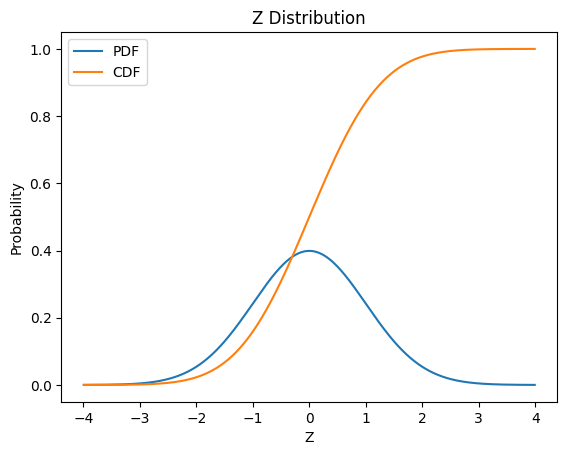

In [ ]:
z_pdf_df = pd.DataFrame({"Z": z_table_df["Z"],
                         "Probability": [sf.z_pdf(z) for z in z_table_df["Z"]]})
z_cdf_df = pd.DataFrame({"Z": z_table_df["Z"],
                         "Probability": [sf.z_cdf(z) for z in z_table_df["Z"]]})
sns.lineplot(z_pdf_df, x="Z", y="Probability", label="PDF")
sns.lineplot(z_cdf_df, x="Z", y="Probability", label="CDF")
plt.title("Z Distribution")

plt.show()

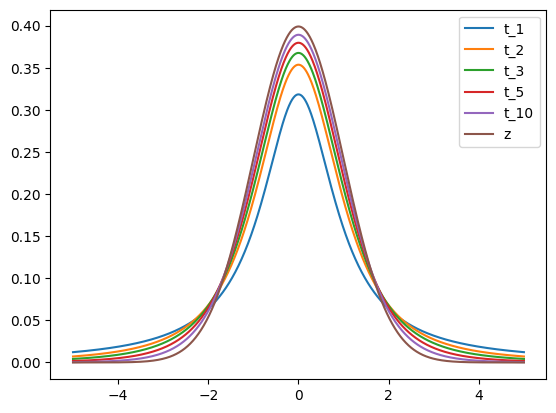

In [ ]:
x_vals = [-5 + i*0.01 for i in range(1001)]

fig, ax = plt.subplots()

ax.plot(x_vals, [sf.t_pdf(1, x) for x in x_vals], label="t_1")
ax.plot(x_vals, [sf.t_pdf(2, x) for x in x_vals], label="t_2")
ax.plot(x_vals, [sf.t_pdf(3, x) for x in x_vals], label="t_3")
ax.plot(x_vals, [sf.t_pdf(5, x) for x in x_vals], label="t_5")
ax.plot(x_vals, [sf.t_pdf(10, x) for x in x_vals], label="t_10")
ax.plot(x_vals, [sf.z_pdf(x) for x in x_vals], label="z")
ax.legend()

plt.show()

In [ ]:
def confInterval(confidence: float, *, 
                 sample: list[int | float] | None = None, 
                 standard_deviation: float | None = None, 
                 mean: int | float | None = None, 
                 sample_size: int | None = None) -> tuple[float]:
    if not isinstance(confidence, (float, int)):
        raise TypeError
    if confidence not in (0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99, 0.998, 0.999):
        raise ValueError
    if not isinstance(sample, (list, None)):
        raise TypeError
    if isinstance(sample, list) and not all(isinstance(val, (int, float)) for val in sample):
        raise TypeError
    if not isinstance(standard_deviation, (float, int, None)):
        raise TypeError
    if isinstance(standard_deviation, (int, float)) and standard_deviation < 0:
        raise ValueError
    if not isinstance(mean, (int, float, None)):
        raise TypeError
    if not isinstance(sample_size, (int, None)):
        raise TypeError
    if isinstance(sample_size, int) and sample_size < 2:
        raise ValueError
    
    if sample is None:
        pass